</a>
    <img src="logo_APL.png" width="400" align="center">
</a>

# Pré-processamento dos Dados em Python

**Bem vindo!** Neste notebook serão discutidoas ferramentas para pré-processamento dos dados em `Python`. Ao final, espera-se que você seja capaz de entender parte do processo de transformação dos dados do formato inicial para um formato mais adequado para análise.

<h2>Conteúdo:</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li>Introdução</li>
    <li>Exemplo de Análise
        <ul>
            <li> Leitura do dataset </li>
            <li> Descrever características básicas dos dados </li>
        </ul>
    </li>
    <li>Agrupamento dos Dados </li>
    <li>Identificar e tratar valores ausentes </li>
    <li>Normalização de dados </li>
    <li>Data Binning </li>
</ul>
</div>


<hr>

<h2>Introdução</h2>

Esta introdução tem por objetivo converter ou mapear dados de uma forma inicial crua para outros formatos, de maneira a preparar os dados para análises posteriores. Sintetizar as principais características  e obter uma melhor compreensão dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A linha `%matplotlib inline` faz parte da mágica do Jupyter para mostrar figuras ao longo do notebook python.

In [2]:
%matplotlib inline

<h2>Exemplo de Análise</h2>


Na seção anterior vimos como manipular dados que foram criados durante esta apresentação, acontece que, na maioria das vezes, queremos analisar dados que já estão prontos.
O pandas nos fornece uma série de funcionalidades de leitura de dados, para os mais diversos formatos estruturais de dados, experimente a auto-completação de `pd.read_<TAB>`, entre eles estão:
 1. `pd.read_csv`, para ler arquivos .csv, formato comum de armazenar dados de tabelas
 1. `pd.read_xlsx`, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.
 1. `pd.read_html`, para ler tabelas diretamente de um website
 
Usaremos para analisar dados externos nesta introdução o `.read_csv`, pois é neste formato que se encontram nossos dados. CSV, ou comma-separated values é um formato muito comum de dados abertos, trata-se, como a sigla sugere, de valores divididos por vírgula, apesar de o caracter separador poder ser o ponto-e-vírgula ou outro.

O arquivo `dados.csv` está na mesma pasta do nosso script, então podemos passar como argumento do `.read_csv` apenas o seu nome. Outro argumento interessante da função é o `sep`, que por padrão é a vírgula, mas que pode ser definido como outro caractere caso seu dado esteja usando outro separador.

Estes dados que usaremos como exemplo são dados sobre preços de apartamentos em 7 bairros da cidade do Rio de Janeiro: Botafogo, Copacabana, Gávea, Grajaú, Ipanema, Leblon, Tijuca. São dados adaptados de um arquivo que pode ser encontrado [aqui](https://raw.githubusercontent.com/mvinoba/notebooks-for-binder/master/dados.csv).

### Leitura do dataset

In [3]:
df = pd.read_csv("dados.csv")
df

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55


### Descrever características básicas dos dados

Como esperado, o DataFrame tem muitas linhas de dados, pra visualizar sucintamente as primeiras linhas de um DataFrame existe o método `.head()`

In [4]:
df.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Por padrão `.head()` exibe as 5 primeiras linhas, mas isso pode ser alterado:

In [5]:
df.head(n=10)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


Similarmente existe o `.tail()`, que exibe por padrão as últimas 5 linhas do DataFrame:

In [6]:
df.tail()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


Pode-se verificar a informação relativas aos bairros usando um método que lista os valores únicos numa coluna, método `unique`:

In [7]:
df["bairro"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

Também parece interessante verificarmos a hegemoneidade da nossa amostra em relação aos bairros. Pra tarefas de contar valores podemos sempre aproveitar de outro método disponível, o `.value_counts()`, também veremos um pouco mais abaixo como visualizar estes valores em forma de gráfico de barras.

In [8]:
df["bairro"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

Os valores contados também podem ser normalizados para expressar porcentagens:

In [9]:
df["bairro"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

## Agrupamento dos Dados

Agrupar os dados se baseando em certos critérios é outro processo que o pandas facilita bastante com o `.groupby()`.
Esse método pode ser usado para resolver os mais **amplos** problemas, aqui abordarei apenas o agrupamento simples, a divisão de um DataFrame em grupos.

Abaixo agrupamos o nosso DataFrame pelos valores da coluna `"bairro"`, e em seguida aplicamos o `.mean()` para termos um objeto GroupBy com informação das médias agrupadas pelos valores da coluna bairros. 

In [10]:
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


Para extrairmos dados de uma coluna deste objeto basta acessá-lo convencionalmente, para obtermos os valores da média do preço do metro quadrado em ordem crescente, por exemplo:

In [11]:
df.groupby("bairro").mean()["pm2"].sort_values()

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

É comum queremos aplicar uma função qualquer aos dados, ou à parte deles, neste caso o pandas fornece o método `.apply`. Por exemplo, para deixar os nomes dos bairros como apenas as suas três primeiras letras:

In [12]:
def truncar(bairro):
    return bairro[:3]

df["bairro"].apply(truncar).head()

0    Bot
1    Bot
2    Bot
3    Bot
4    Bot
Name: bairro, dtype: object

Ou de um jeito mais prático, usando uma função `lambda`:

In [13]:
df["bairro"].apply(lambda x: x[:3]).head()

0    Bot
1    Bot
2    Bot
3    Bot
4    Bot
Name: bairro, dtype: object

## Identificar e tratar valores ausentes

Uma das tarefas na qual o pandas é reconhecidamente poderoso é a habilidade de tratar dados incompletos.
Por muitos motivos pode haver incompletude no dataset, o `np.nan` é um valor especial definido no Numpy, sigla para Not a Number, o pandas preenche células sem valores em um DataFrame lido com `np.nan`.

Vamos criar um novo dataframe usando as 5 primeiras linhas do nosso original, usando o já visto `.head()`. Abaixo é usado o `.replace` para substituir um valor específico por um `NaN`. 

In [14]:
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,NaN
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


O pandas simplifica a remoção de quaiquer linhas ou colunas que possuem um `np.nan`, por padrão o `.dropna()` retorna as linhas que não contém um NaN:

In [15]:
df2.dropna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Preencher todos os valores NaN por um outro específico também é bastante simples:

In [16]:
df2.fillna(99)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,99.00
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Acaba sendo muitas vezes conveniente termos um método que indica quais valores de um dataframe são NaN e quais não são:

In [17]:
df2.isna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


## Normalização de dados

<b>Por que normalização?</b>

Normalização (padronização) é o processo de transformar valores de várias variáveis (em escalas de valores diferentes) para uma faixa única, comum a todas. As normalizações típicas incluem, mas não se limitam, a: i) dimensionar a variável para que sua média seja 0 e sua variância seja 1 ou ii) dimensionar a variável para que sua faixa de valores varie entre 0 a 1

<b>Exemplo</b>
<p>Para demonstrar o procedimento de normalização, usaremos a coluna "condominio", de forma que o valor normalizado varie entre 0 e 1. </p>

In [18]:
# replace (original value) by (original value)/(maximum value)
df['condominio_normalizado'] = df['condominio']/df['condominio'].max()
df[['condominio', 'condominio_normalizado']]

,condominio,condominio_normalizado
0,350,0.049498
1,800,0.113138
2,674,0.095319
3,700,0.098996
4,440,0.062226
...,...,...
1992,1080,0.152737
1993,750,0.106067
1994,700,0.098996
1995,1850,0.261632


## Data Binning

Conceito de _Data Binning_: processo de transformar dados numéricos em variáveis categóricas (limitadas por faixas de valores).

O método `cut` do **Pandas** divide o conjunto de dados em variáveis categóricas (ou seja, _bins_)  limitadas por faixas de valores. No exemplo a seguir, foram utilizadas faixas de mesma largura. O método `value_counts` retorna uma tabela de frequência representando o número de ocorrências dentro de cada faixa de valores. Usaremos a feature que representa o custo (em R$) do condomínio.

In [19]:
binnedPopulation = pd.cut(df['condominio'], 10)
print(binnedPopulation.value_counts())

(708.0, 1415.0]     839
(-6.07, 708.0]      831
(1415.0, 2122.0]    236
(2122.0, 2829.0]     51
(2829.0, 3536.0]     16
(3536.0, 4243.0]     15
(4243.0, 4950.0]      4
(4950.0, 5657.0]      3
(6364.0, 7071.0]      2
(5657.0, 6364.0]      0
Name: condominio, dtype: int64


**Interpretando esse resultado**: existem 839 residências em que o condomínio custa entre 708 e 1415 reais. Em 831 residências, esse custo é menor que 708 reais. Em 236, esse custo varia entre 1.415 e 2.122 reais. E assim sucessivamente...

O gráfico de **histograma ilustra graficamente** essa representação dos valores numéricos agrupados em faixas de valores (_bins_).

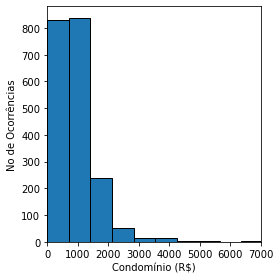

In [20]:
ax = (df['condominio']).plot.hist(bins=10, edgecolor='black', figsize=(4, 4))
ax.set_xlabel('Condomínio (R$)')
ax.set_ylabel('No de Ocorrências')
ax.set_xlim(0, 7000)

plt.tight_layout()
plt.show()